In [1]:
import dask.dataframe as dd 
import numpy as np
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
import seaborn as sns
import featuretools as ft
from dask.distributed import Client
from sklearn.metrics import f1_score, confusion_matrix, classification_report,accuracy_score,roc_auc_score,recall_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from utils import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=dd.read_csv("data_clean.csv").compute()

In [3]:
X=data.drop(['TARGET'],axis=1)
y=data['TARGET']

In [4]:
ss=StandardScaler()
X=ss.fit_transform(X)

In [5]:
X_train, X_test, y_train ,y_test =train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
def evaluationClassification(model):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("accuracy : ",round(accuracy_score(y_test, y_pred),3))
    a,b,threshold=roc_curve(y_test,model.predict_proba(X_test)[:,1])
    auc_pred=auc(a,b)
    print("roc_auc_score : ",round(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),3))
    print("recall score : " ,round(recall_score(y_test, y_pred),3))
    print("f1 score : " ,round(f1_score(y_test, y_pred),3))
    plt.title('ROC curve')
    plt.plot(a,b)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.legend()
    plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb



              precision    recall  f1-score   support

           0       0.95      0.85      0.90     56550
           1       0.23      0.52      0.32      4953

    accuracy                           0.82     61503
   macro avg       0.59      0.68      0.61     61503
weighted avg       0.89      0.82      0.85     61503

[[47869  8681]
 [ 2391  2562]]
accuracy :  0.82
roc_auc_score :  0.682
recall score :  0.517
f1 score :  0.316


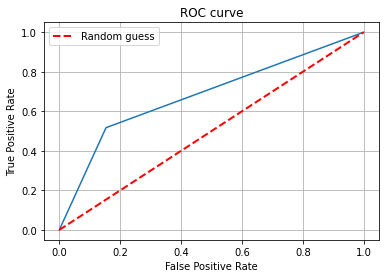

In [20]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(
 learning_rate=0.01,
 n_estimators=500,
objective="binary:logistic",subsample= 0.4,
 max_depth= 7,
 scale_pos_weight=8,
 colsample_bytree= 0.4,
 gamma=10,
 eta=0.4,
 eval_metric="auc",
 ))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     56550
           1       0.21      0.56      0.31      4953

    accuracy                           0.80     61503
   macro avg       0.58      0.69      0.59     61503
weighted avg       0.89      0.80      0.84     61503

[[46348 10202]
 [ 2204  2749]]
accuracy :  0.798
roc_auc_score :  0.687
recall score :  0.555
f1 score :  0.307


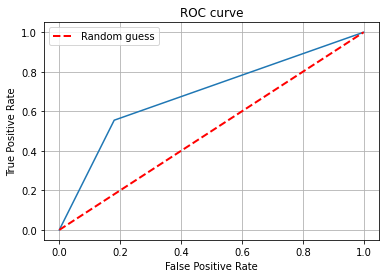

In [ ]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(

objective="binary:logistic",
 scale_pos_weight=8,
 eval_metric="auc",
 max_depth=4
))

              precision    recall  f1-score   support

           0       0.96      0.72      0.83     56550
           1       0.18      0.69      0.28      4953

    accuracy                           0.72     61503
   macro avg       0.57      0.71      0.55     61503
weighted avg       0.90      0.72      0.78     61503

[[40841 15709]
 [ 1535  3418]]
accuracy :  0.72
roc_auc_score :  0.774
recall score :  0.69
f1 score :  0.284


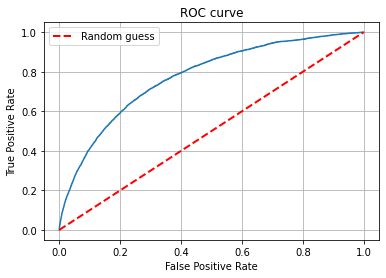

In [43]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(

objective="binary:logistic",
 scale_pos_weight=12,
 eval_metric="auc",
 max_depth=4
))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88     56550
           1       0.21      0.58      0.31      4953

    accuracy                           0.80     61503
   macro avg       0.59      0.70      0.60     61503
weighted avg       0.90      0.80      0.83     61503

[[46070 10480]
 [ 2100  2853]]
accuracy :  0.795
roc_auc_score :  0.695
recall score :  0.576
f1 score :  0.312


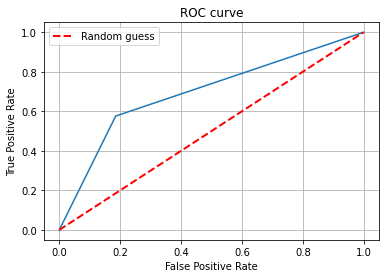

In [ ]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(

objective="binary:logistic",
 scale_pos_weight=8,
 eval_metric="auc",
 max_depth=3
))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     56550
           1       0.17      0.71      0.28      4953

    accuracy                           0.70     61503
   macro avg       0.57      0.71      0.55     61503
weighted avg       0.90      0.70      0.77     61503

[[39808 16742]
 [ 1441  3512]]
accuracy :  0.704
roc_auc_score :  0.773
recall score :  0.709
f1 score :  0.279


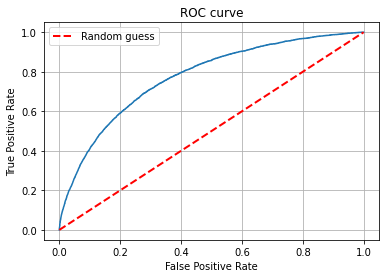

In [42]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(

objective="binary:logistic",
 scale_pos_weight=12,
 eval_metric="auc",
 max_depth=3
))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     56550
           1       0.22      0.54      0.31      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.69      0.60     61503
weighted avg       0.89      0.81      0.84     61503

[[47012  9538]
 [ 2274  2679]]
accuracy :  0.808
roc_auc_score :  0.686
recall score :  0.541
f1 score :  0.312


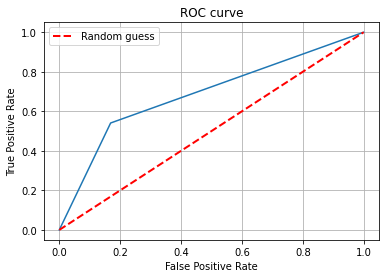

In [ ]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(

objective="binary:logistic",
 scale_pos_weight=8,
 eval_metric="auc",
 max_depth=5
))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84     56550
           1       0.18      0.66      0.28      4953

    accuracy                           0.73     61503
   macro avg       0.57      0.70      0.56     61503
weighted avg       0.90      0.73      0.79     61503

[[41848 14702]
 [ 1691  3262]]
accuracy :  0.733
roc_auc_score :  0.769
recall score :  0.659
f1 score :  0.285


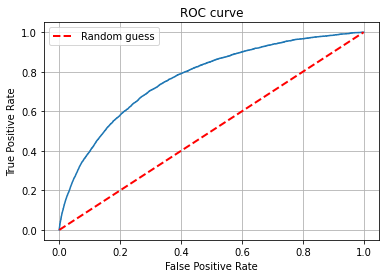

In [41]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(

objective="binary:logistic",
 scale_pos_weight=12,
 eval_metric="auc",
 max_depth=5
))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56550
           1       0.23      0.46      0.31      4953

    accuracy                           0.83     61503
   macro avg       0.59      0.66      0.61     61503
weighted avg       0.89      0.83      0.86     61503

[[48805  7745]
 [ 2651  2302]]
accuracy :  0.831
roc_auc_score :  0.664
recall score :  0.465
f1 score :  0.307


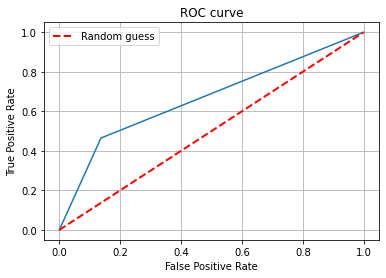

In [ ]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(

objective="binary:logistic",
 scale_pos_weight=8,
 eval_metric="auc",
 max_depth=7
))

              precision    recall  f1-score   support

           0       0.95      0.79      0.87     56550
           1       0.20      0.57      0.29      4953

    accuracy                           0.78     61503
   macro avg       0.58      0.68      0.58     61503
weighted avg       0.89      0.78      0.82     61503

[[44954 11596]
 [ 2136  2817]]
accuracy :  0.777
roc_auc_score :  0.752
recall score :  0.569
f1 score :  0.291


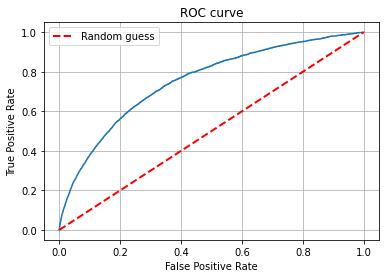

In [40]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(

objective="binary:logistic",
 scale_pos_weight=12,
 eval_metric="auc",
 max_depth=7
))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     56550
           1       0.22      0.51      0.31      4953

    accuracy                           0.82     61503
   macro avg       0.59      0.68      0.60     61503
weighted avg       0.89      0.82      0.85     61503

[[47794  8756]
 [ 2435  2518]]
accuracy :  0.818
roc_auc_score :  0.677
recall score :  0.508
f1 score :  0.31


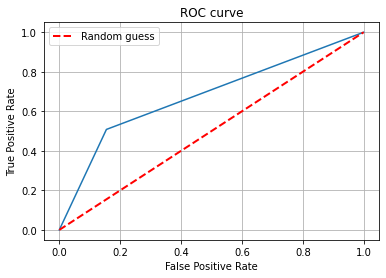

In [ ]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(

objective="binary:logistic",
 scale_pos_weight=8,
 eval_metric="auc",
 max_depth=6
))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85     56550
           1       0.19      0.62      0.29      4953

    accuracy                           0.75     61503
   macro avg       0.57      0.69      0.57     61503
weighted avg       0.90      0.75      0.81     61503

[[43304 13246]
 [ 1877  3076]]
accuracy :  0.754
roc_auc_score :  0.761
recall score :  0.621
f1 score :  0.289


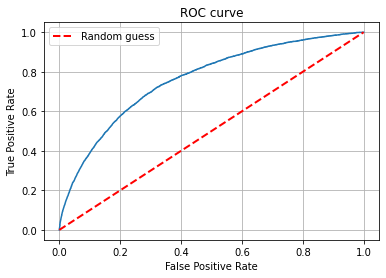

In [39]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(

objective="binary:logistic",
 scale_pos_weight=12,
 eval_metric="auc",
 max_depth=6
))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     56550
           1       0.22      0.51      0.31      4953

    accuracy                           0.82     61503
   macro avg       0.59      0.68      0.60     61503
weighted avg       0.89      0.82      0.85     61503

[[47794  8756]
 [ 2435  2518]]
accuracy :  0.818
roc_auc_score :  0.765
recall score :  0.508
f1 score :  0.31


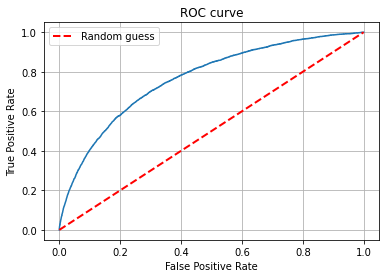

In [36]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(

objective="binary:logistic",
 scale_pos_weight=8,
 eval_metric="auc"
))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     56550
           1       0.21      0.54      0.30      4953

    accuracy                           0.80     61503
   macro avg       0.58      0.68      0.59     61503
weighted avg       0.89      0.80      0.84     61503

[[46444 10106]
 [ 2264  2689]]
accuracy :  0.799
roc_auc_score :  0.762
recall score :  0.543
f1 score :  0.303


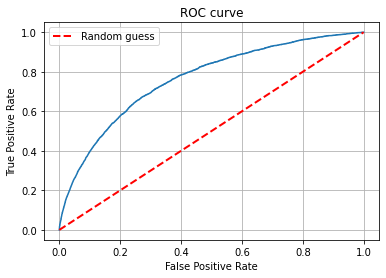

In [45]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(

objective="binary:logistic",
 scale_pos_weight=9,
 eval_metric="auc"
))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85     56550
           1       0.19      0.62      0.29      4953

    accuracy                           0.75     61503
   macro avg       0.57      0.69      0.57     61503
weighted avg       0.90      0.75      0.81     61503

[[43304 13246]
 [ 1877  3076]]
accuracy :  0.754
roc_auc_score :  0.693
recall score :  0.621
f1 score :  0.289


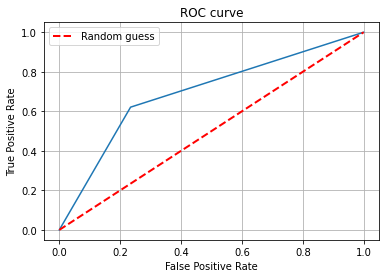

In [ ]:
import xgboost as xgb
evaluationClassification(xgb.XGBClassifier(

objective="binary:logistic",
 scale_pos_weight=12,
 eval_metric="auc"
))

i :  10
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     56550
           1       0.19      0.63      0.30      4953

    accuracy                           0.76     61503
   macro avg       0.58      0.70      0.57     61503
weighted avg       0.90      0.76      0.81     61503

[[43499 13051]
 [ 1828  3125]]
accuracy :  0.758
roc_auc_score :  0.773
recall score :  0.631
f1 score :  0.296


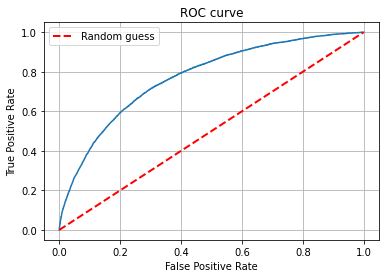

i :  11
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     56550
           1       0.19      0.66      0.29      4953

    accuracy                           0.74     61503
   macro avg       0.57      0.70      0.56     61503
weighted avg       0.90      0.74      0.80     61503

[[42174 14376]
 [ 1678  3275]]
accuracy :  0.739
roc_auc_score :  0.774
recall score :  0.661
f1 score :  0.29


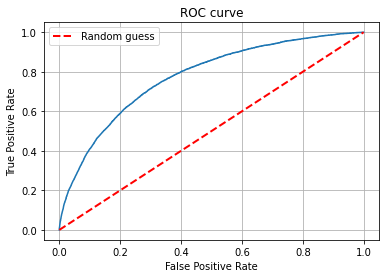

i :  12
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     56550
           1       0.18      0.69      0.28      4953

    accuracy                           0.72     61503
   macro avg       0.57      0.71      0.55     61503
weighted avg       0.90      0.72      0.78     61503

[[40841 15709]
 [ 1535  3418]]
accuracy :  0.72
roc_auc_score :  0.774
recall score :  0.69
f1 score :  0.284


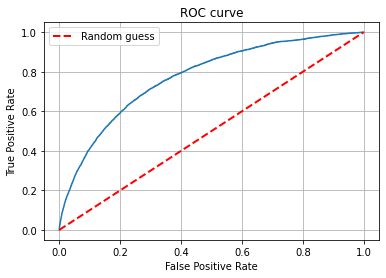

i :  13
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     56550
           1       0.17      0.71      0.28      4953

    accuracy                           0.70     61503
   macro avg       0.57      0.71      0.54     61503
weighted avg       0.90      0.70      0.77     61503

[[39521 17029]
 [ 1423  3530]]
accuracy :  0.7
roc_auc_score :  0.772
recall score :  0.713
f1 score :  0.277


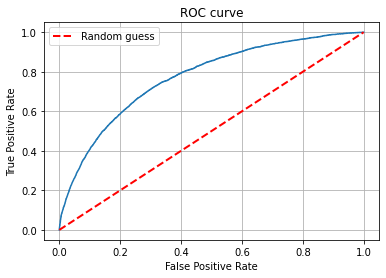

i :  14
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     56550
           1       0.17      0.73      0.27      4953

    accuracy                           0.68     61503
   macro avg       0.57      0.71      0.53     61503
weighted avg       0.90      0.68      0.76     61503

[[38404 18146]
 [ 1331  3622]]
accuracy :  0.683
roc_auc_score :  0.773
recall score :  0.731
f1 score :  0.271


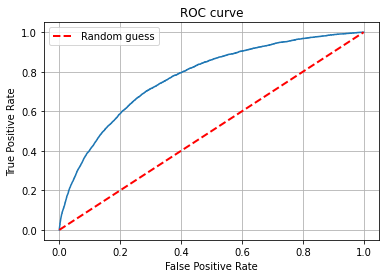

In [57]:
for i in range(10,15,1):
    print("i : ",i)
    evaluationClassification(xgb.XGBClassifier(

    objective="binary:logistic",
    scale_pos_weight=i,
    eval_metric="auc",
    max_depth=4
))

<h2>max depth ==3</h2>

i :  10
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     56550
           1       0.19      0.65      0.30      4953

    accuracy                           0.75     61503
   macro avg       0.58      0.71      0.57     61503
weighted avg       0.90      0.75      0.80     61503

[[42827 13723]
 [ 1717  3236]]
accuracy :  0.749
roc_auc_score :  0.775
recall score :  0.653
f1 score :  0.295


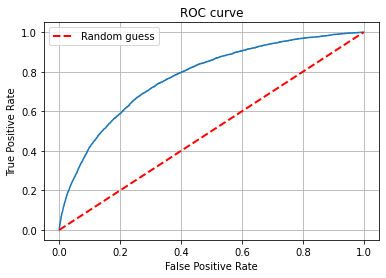

i :  11
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     56550
           1       0.18      0.68      0.29      4953

    accuracy                           0.73     61503
   macro avg       0.57      0.71      0.56     61503
weighted avg       0.90      0.73      0.79     61503

[[41288 15262]
 [ 1581  3372]]
accuracy :  0.726
roc_auc_score :  0.774
recall score :  0.681
f1 score :  0.286


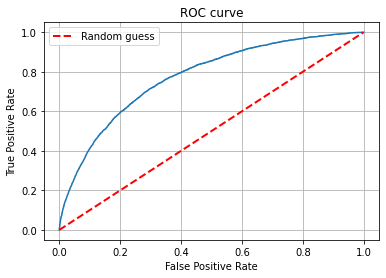

i :  12
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     56550
           1       0.17      0.71      0.28      4953

    accuracy                           0.70     61503
   macro avg       0.57      0.71      0.55     61503
weighted avg       0.90      0.70      0.77     61503

[[39808 16742]
 [ 1441  3512]]
accuracy :  0.704
roc_auc_score :  0.773
recall score :  0.709
f1 score :  0.279


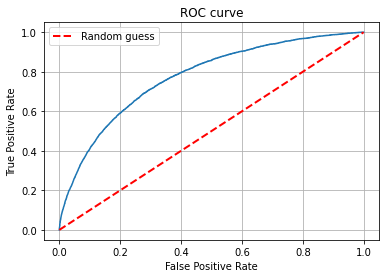

i :  13
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     56550
           1       0.17      0.73      0.27      4953

    accuracy                           0.68     61503
   macro avg       0.57      0.71      0.54     61503
weighted avg       0.90      0.68      0.76     61503

[[38487 18063]
 [ 1328  3625]]
accuracy :  0.685
roc_auc_score :  0.774
recall score :  0.732
f1 score :  0.272


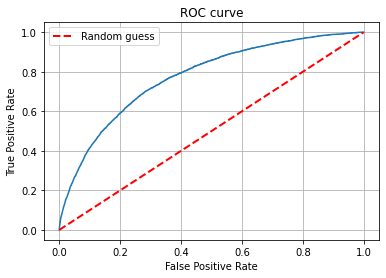

i :  14
              precision    recall  f1-score   support

           0       0.97      0.66      0.78     56550
           1       0.16      0.75      0.27      4953

    accuracy                           0.67     61503
   macro avg       0.57      0.71      0.53     61503
weighted avg       0.90      0.67      0.74     61503

[[37319 19231]
 [ 1234  3719]]
accuracy :  0.667
roc_auc_score :  0.774
recall score :  0.751
f1 score :  0.267


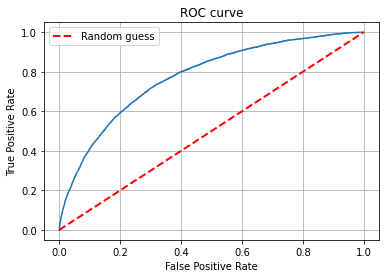

In [58]:
for i in range(10,15,1):
    print("i : ",i)
    evaluationClassification(xgb.XGBClassifier(

    objective="binary:logistic",
    scale_pos_weight=i,
    eval_metric="auc",
    max_depth=3
))

<h2>GAMMA</h2>

In [20]:
l=[i for i in range(1,11)] 

i :  0.1
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     56550
           1       0.18      0.69      0.29      4953

    accuracy                           0.72     61503
   macro avg       0.57      0.71      0.56     61503
weighted avg       0.90      0.72      0.78     61503

[[40876 15674]
 [ 1525  3428]]
accuracy :  0.72
roc_auc_score :  0.774
recall score :  0.692
f1 score :  0.285


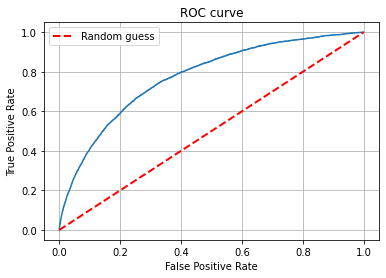

i :  0.2
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     56550
           1       0.18      0.69      0.29      4953

    accuracy                           0.72     61503
   macro avg       0.57      0.71      0.56     61503
weighted avg       0.90      0.72      0.78     61503

[[40876 15674]
 [ 1525  3428]]
accuracy :  0.72
roc_auc_score :  0.774
recall score :  0.692
f1 score :  0.285


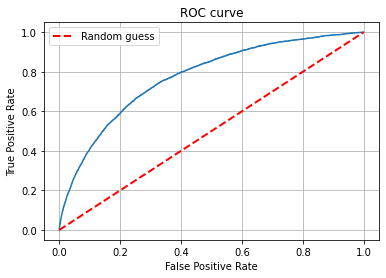

i :  0.3
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     56550
           1       0.18      0.69      0.28      4953

    accuracy                           0.72     61503
   macro avg       0.57      0.71      0.56     61503
weighted avg       0.90      0.72      0.78     61503

[[40887 15663]
 [ 1532  3421]]
accuracy :  0.72
roc_auc_score :  0.773
recall score :  0.691
f1 score :  0.285


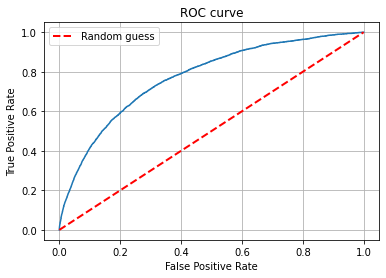

i :  0.4
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     56550
           1       0.18      0.69      0.29      4953

    accuracy                           0.72     61503
   macro avg       0.57      0.71      0.56     61503
weighted avg       0.90      0.72      0.78     61503

[[40920 15630]
 [ 1524  3429]]
accuracy :  0.721
roc_auc_score :  0.773
recall score :  0.692
f1 score :  0.286


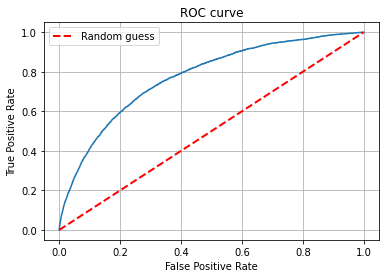

i :  0.0
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     56550
           1       0.18      0.69      0.28      4953

    accuracy                           0.72     61503
   macro avg       0.57      0.71      0.55     61503
weighted avg       0.90      0.72      0.78     61503

[[40841 15709]
 [ 1535  3418]]
accuracy :  0.72
roc_auc_score :  0.774
recall score :  0.69
f1 score :  0.284


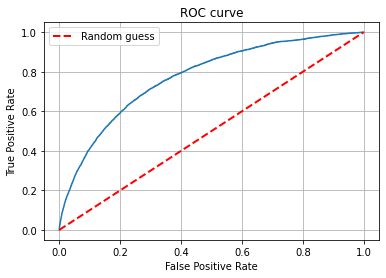

i :  0.01
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     56550
           1       0.18      0.69      0.28      4953

    accuracy                           0.72     61503
   macro avg       0.57      0.71      0.55     61503
weighted avg       0.90      0.72      0.78     61503

[[40841 15709]
 [ 1535  3418]]
accuracy :  0.72
roc_auc_score :  0.774
recall score :  0.69
f1 score :  0.284


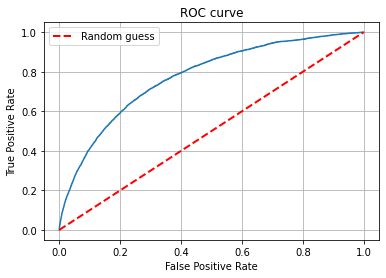

i :  0.02
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     56550
           1       0.18      0.69      0.28      4953

    accuracy                           0.72     61503
   macro avg       0.57      0.71      0.55     61503
weighted avg       0.90      0.72      0.78     61503

[[40841 15709]
 [ 1535  3418]]
accuracy :  0.72
roc_auc_score :  0.774
recall score :  0.69
f1 score :  0.284


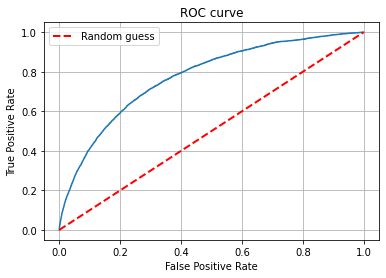

i :  0.03
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     56550
           1       0.18      0.69      0.29      4953

    accuracy                           0.72     61503
   macro avg       0.57      0.71      0.56     61503
weighted avg       0.90      0.72      0.78     61503

[[40877 15673]
 [ 1524  3429]]
accuracy :  0.72
roc_auc_score :  0.774
recall score :  0.692
f1 score :  0.285


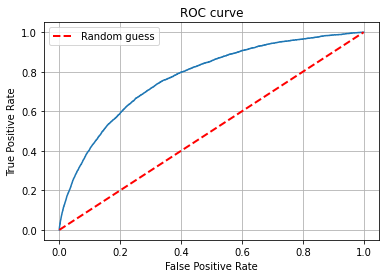

i :  0.04
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     56550
           1       0.18      0.69      0.29      4953

    accuracy                           0.72     61503
   macro avg       0.57      0.71      0.56     61503
weighted avg       0.90      0.72      0.78     61503

[[40877 15673]
 [ 1524  3429]]
accuracy :  0.72
roc_auc_score :  0.774
recall score :  0.692
f1 score :  0.285


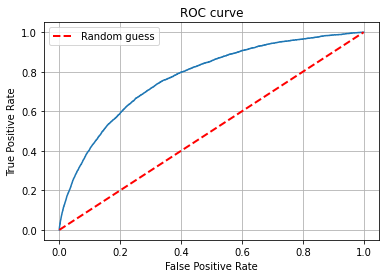

In [24]:
for i in l:
    print("i : ",i)
    evaluationClassification(xgb.XGBClassifier(

    objective="binary:logistic",
    scale_pos_weight=12,
    eval_metric="auc",
    max_depth=4,
    gamma=i,
    nthread=4
))

i :  1
              precision    recall  f1-score   support

           0       0.95      0.87      0.90     56550
           1       0.23      0.45      0.30      4953

    accuracy                           0.83     61503
   macro avg       0.59      0.66      0.60     61503
weighted avg       0.89      0.83      0.86     61503

[[48955  7595]
 [ 2700  2253]]
accuracy :  0.833
roc_auc_score :  0.757
recall score :  0.455
f1 score :  0.304


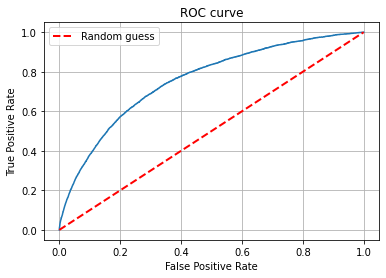

i :  2
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56550
           1       0.23      0.46      0.31      4953

    accuracy                           0.83     61503
   macro avg       0.59      0.66      0.61     61503
weighted avg       0.89      0.83      0.86     61503

[[48831  7719]
 [ 2655  2298]]
accuracy :  0.831
roc_auc_score :  0.755
recall score :  0.464
f1 score :  0.307


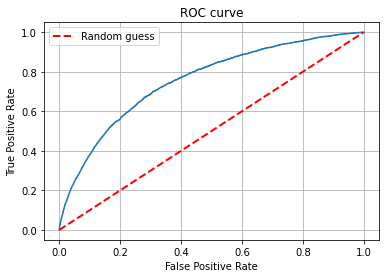

i :  3
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56550
           1       0.23      0.45      0.30      4953

    accuracy                           0.83     61503
   macro avg       0.59      0.66      0.60     61503
weighted avg       0.89      0.83      0.86     61503

[[48823  7727]
 [ 2702  2251]]
accuracy :  0.83
roc_auc_score :  0.754
recall score :  0.454
f1 score :  0.302


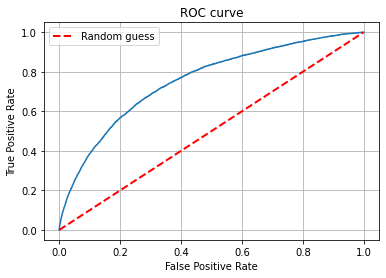

i :  4
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56550
           1       0.23      0.46      0.31      4953

    accuracy                           0.83     61503
   macro avg       0.59      0.66      0.60     61503
weighted avg       0.89      0.83      0.86     61503

[[48821  7729]
 [ 2663  2290]]
accuracy :  0.831
roc_auc_score :  0.755
recall score :  0.462
f1 score :  0.306


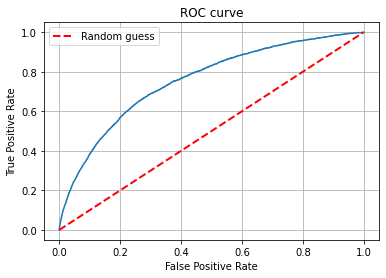

i :  5
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     56550
           1       0.23      0.46      0.31      4953

    accuracy                           0.83     61503
   macro avg       0.59      0.66      0.61     61503
weighted avg       0.89      0.83      0.86     61503

[[49003  7547]
 [ 2680  2273]]
accuracy :  0.834
roc_auc_score :  0.755
recall score :  0.459
f1 score :  0.308


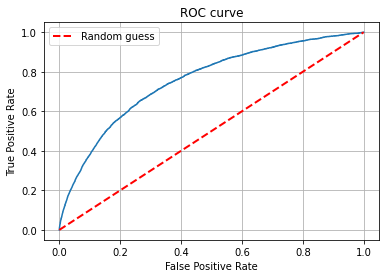

i :  6
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56550
           1       0.23      0.46      0.31      4953

    accuracy                           0.83     61503
   macro avg       0.59      0.66      0.60     61503
weighted avg       0.89      0.83      0.86     61503

[[48812  7738]
 [ 2668  2285]]
accuracy :  0.831
roc_auc_score :  0.757
recall score :  0.461
f1 score :  0.305


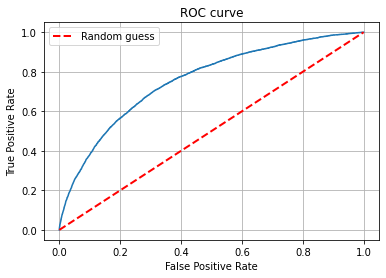

i :  7
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56550
           1       0.22      0.45      0.30      4953

    accuracy                           0.83     61503
   macro avg       0.59      0.66      0.60     61503
weighted avg       0.89      0.83      0.85     61503

[[48804  7746]
 [ 2708  2245]]
accuracy :  0.83
roc_auc_score :  0.753
recall score :  0.453
f1 score :  0.3


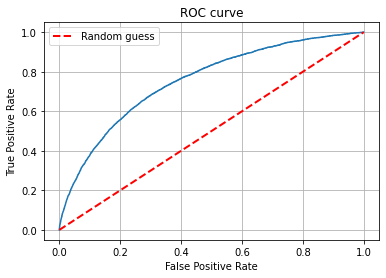

i :  8
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56550
           1       0.23      0.46      0.31      4953

    accuracy                           0.83     61503
   macro avg       0.59      0.66      0.60     61503
weighted avg       0.89      0.83      0.86     61503

[[48811  7739]
 [ 2668  2285]]
accuracy :  0.831
roc_auc_score :  0.756
recall score :  0.461
f1 score :  0.305


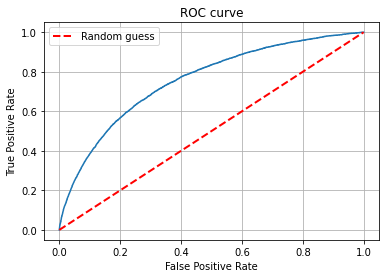

i :  9
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56550
           1       0.23      0.47      0.31      4953

    accuracy                           0.83     61503
   macro avg       0.59      0.66      0.61     61503
weighted avg       0.89      0.83      0.86     61503

[[48743  7807]
 [ 2640  2313]]
accuracy :  0.83
roc_auc_score :  0.757
recall score :  0.467
f1 score :  0.307


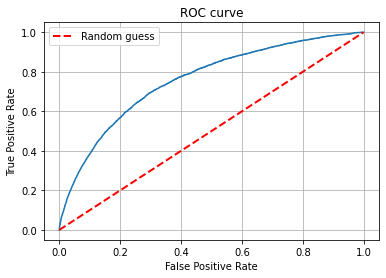

i :  10
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56550
           1       0.23      0.46      0.30      4953

    accuracy                           0.83     61503
   macro avg       0.59      0.66      0.60     61503
weighted avg       0.89      0.83      0.86     61503

[[48831  7719]
 [ 2690  2263]]
accuracy :  0.831
roc_auc_score :  0.757
recall score :  0.457
f1 score :  0.303


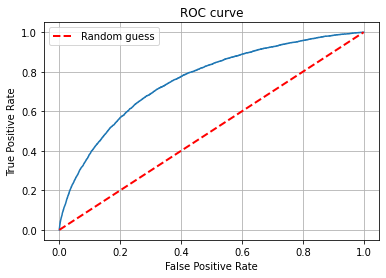

In [21]:
for i in l:
    print("i : ",i)
    evaluationClassification(xgb.XGBClassifier(

    objective="binary:logistic",
    scale_pos_weight=8,
    eval_metric="auc",
    max_depth=7,
    gamma=i,
    nthread=20
))

In [23]:
l=[i/10.0 for i in range(2,11,1)]

i :  0.2
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     56550
           1       0.18      0.70      0.28      4953

    accuracy                           0.71     61503
   macro avg       0.57      0.71      0.55     61503
weighted avg       0.90      0.71      0.78     61503

[[40474 16076]
 [ 1486  3467]]
accuracy :  0.714
roc_auc_score :  0.776
recall score :  0.7
f1 score :  0.283


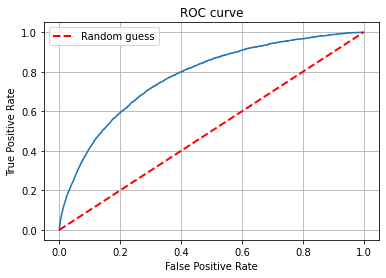

i :  0.3
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     56550
           1       0.18      0.69      0.29      4953

    accuracy                           0.72     61503
   macro avg       0.57      0.71      0.56     61503
weighted avg       0.90      0.72      0.78     61503

[[40920 15630]
 [ 1524  3429]]
accuracy :  0.721
roc_auc_score :  0.773
recall score :  0.692
f1 score :  0.286


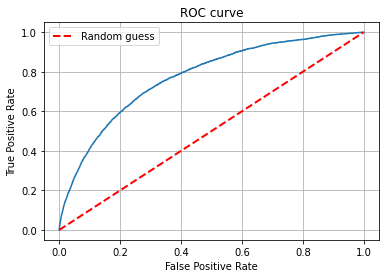

i :  0.4
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     56550
           1       0.18      0.68      0.28      4953

    accuracy                           0.72     61503
   macro avg       0.57      0.70      0.56     61503
weighted avg       0.90      0.72      0.78     61503

[[41087 15463]
 [ 1598  3355]]
accuracy :  0.723
roc_auc_score :  0.767
recall score :  0.677
f1 score :  0.282


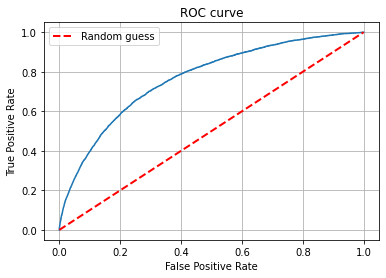

i :  0.5
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     56550
           1       0.18      0.67      0.28      4953

    accuracy                           0.72     61503
   macro avg       0.57      0.70      0.55     61503
weighted avg       0.90      0.72      0.78     61503

[[41152 15398]
 [ 1629  3324]]
accuracy :  0.723
roc_auc_score :  0.762
recall score :  0.671
f1 score :  0.281


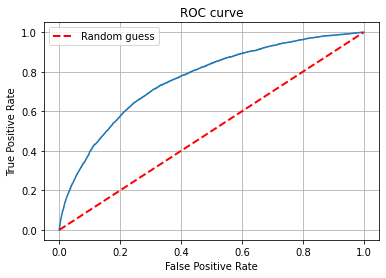

i :  0.6
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     56550
           1       0.18      0.66      0.28      4953

    accuracy                           0.73     61503
   macro avg       0.57      0.69      0.55     61503
weighted avg       0.90      0.73      0.79     61503

[[41401 15149]
 [ 1700  3253]]
accuracy :  0.726
roc_auc_score :  0.758
recall score :  0.657
f1 score :  0.279


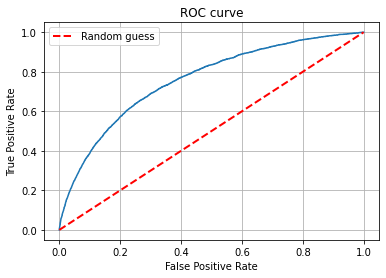

i :  0.7
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     56550
           1       0.17      0.65      0.28      4953

    accuracy                           0.73     61503
   macro avg       0.57      0.69      0.55     61503
weighted avg       0.90      0.73      0.79     61503

[[41467 15083]
 [ 1758  3195]]
accuracy :  0.726
roc_auc_score :  0.752
recall score :  0.645
f1 score :  0.275


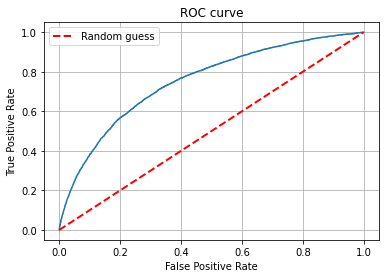

i :  0.8
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     56550
           1       0.17      0.63      0.27      4953

    accuracy                           0.72     61503
   macro avg       0.56      0.68      0.55     61503
weighted avg       0.89      0.72      0.78     61503

[[41433 15117]
 [ 1840  3113]]
accuracy :  0.724
roc_auc_score :  0.742
recall score :  0.629
f1 score :  0.269


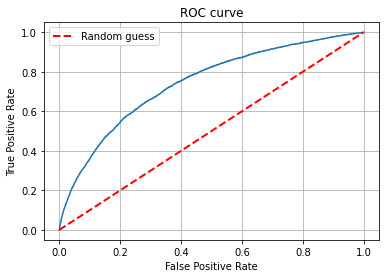

i :  0.9
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     56550
           1       0.17      0.63      0.27      4953

    accuracy                           0.72     61503
   macro avg       0.56      0.68      0.55     61503
weighted avg       0.89      0.72      0.78     61503

[[41404 15146]
 [ 1854  3099]]
accuracy :  0.724
roc_auc_score :  0.74
recall score :  0.626
f1 score :  0.267


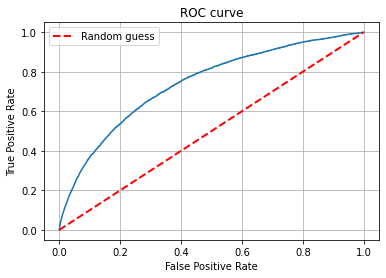

i :  1.0
              precision    recall  f1-score   support

           0       0.96      0.74      0.83     56550
           1       0.17      0.62      0.27      4953

    accuracy                           0.73     61503
   macro avg       0.56      0.68      0.55     61503
weighted avg       0.89      0.73      0.79     61503

[[41734 14816]
 [ 1876  3077]]
accuracy :  0.729
roc_auc_score :  0.738
recall score :  0.621
f1 score :  0.269


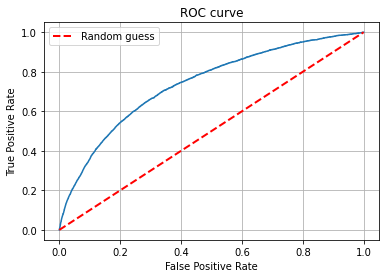

In [24]:
for i in l:
    print("i : ",i)
    evaluationClassification(xgb.XGBClassifier(
    gamma=0.4,
    objective="binary:logistic",
    scale_pos_weight=12,
    eval_metric="auc",
    max_depth=4,
    learning_rate=i,
    nthread=4
))

In [25]:
l=[i/10.0 for i in range(11,25,1)]

i :  1.1
              precision    recall  f1-score   support

           0       0.95      0.73      0.83     56550
           1       0.16      0.60      0.26      4953

    accuracy                           0.72     61503
   macro avg       0.56      0.67      0.54     61503
weighted avg       0.89      0.72      0.78     61503

[[41454 15096]
 [ 1977  2976]]
accuracy :  0.722
roc_auc_score :  0.727
recall score :  0.601
f1 score :  0.259


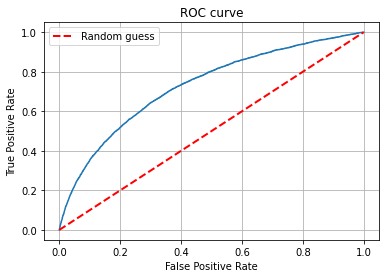

i :  1.2
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     56550
           1       0.17      0.62      0.27      4953

    accuracy                           0.72     61503
   macro avg       0.56      0.68      0.55     61503
weighted avg       0.89      0.72      0.79     61503

[[41508 15042]
 [ 1890  3063]]
accuracy :  0.725
roc_auc_score :  0.73
recall score :  0.618
f1 score :  0.266


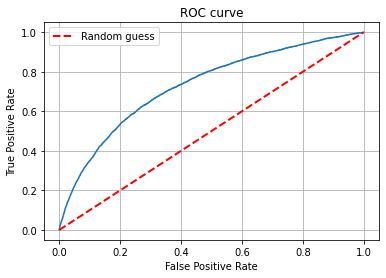

i :  1.3
              precision    recall  f1-score   support

           0       0.95      0.74      0.83     56550
           1       0.16      0.59      0.26      4953

    accuracy                           0.72     61503
   macro avg       0.56      0.66      0.54     61503
weighted avg       0.89      0.72      0.78     61503

[[41580 14970]
 [ 2030  2923]]
accuracy :  0.724
roc_auc_score :  0.721
recall score :  0.59
f1 score :  0.256


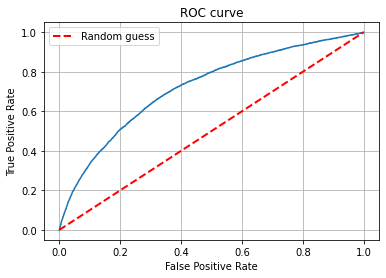

i :  1.4
              precision    recall  f1-score   support

           0       0.95      0.73      0.83     56550
           1       0.16      0.60      0.26      4953

    accuracy                           0.72     61503
   macro avg       0.56      0.67      0.54     61503
weighted avg       0.89      0.72      0.78     61503

[[41423 15127]
 [ 1993  2960]]
accuracy :  0.722
roc_auc_score :  0.716
recall score :  0.598
f1 score :  0.257


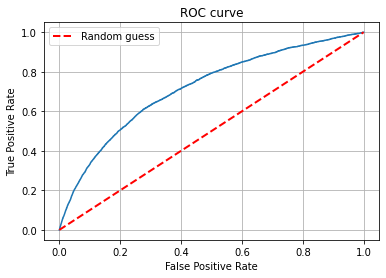

i :  1.5
              precision    recall  f1-score   support

           0       0.95      0.73      0.83     56550
           1       0.16      0.59      0.25      4953

    accuracy                           0.72     61503
   macro avg       0.56      0.66      0.54     61503
weighted avg       0.89      0.72      0.78     61503

[[41208 15342]
 [ 2036  2917]]
accuracy :  0.717
roc_auc_score :  0.714
recall score :  0.589
f1 score :  0.251


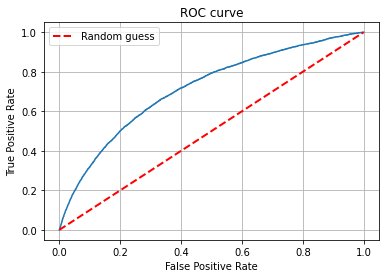

i :  1.6
              precision    recall  f1-score   support

           0       0.95      0.72      0.82     56550
           1       0.16      0.59      0.25      4953

    accuracy                           0.71     61503
   macro avg       0.56      0.66      0.54     61503
weighted avg       0.89      0.71      0.78     61503

[[40987 15563]
 [ 2017  2936]]
accuracy :  0.714
roc_auc_score :  0.711
recall score :  0.593
f1 score :  0.25


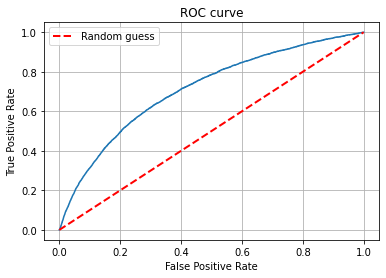

i :  1.7


KeyboardInterrupt: 

In [26]:
for i in l:
    print("i : ",i)
    evaluationClassification(xgb.XGBClassifier(
    gamma=0.4,
    objective="binary:logistic",
    scale_pos_weight=12,
    eval_metric="auc",
    max_depth=4,
    learning_rate=i,
    nthread=4
))

i :  0.02
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     56550
           1       0.21      0.53      0.30      4953

    accuracy                           0.80     61503
   macro avg       0.58      0.68      0.59     61503
weighted avg       0.89      0.80      0.84     61503

[[46530 10020]
 [ 2325  2628]]
accuracy :  0.799
roc_auc_score :  0.756
recall score :  0.531
f1 score :  0.299


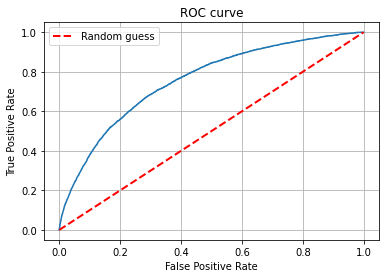

i :  0.03
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     56550
           1       0.21      0.53      0.30      4953

    accuracy                           0.80     61503
   macro avg       0.58      0.68      0.60     61503
weighted avg       0.89      0.80      0.84     61503

[[46795  9755]
 [ 2310  2643]]
accuracy :  0.804
roc_auc_score :  0.763
recall score :  0.534
f1 score :  0.305


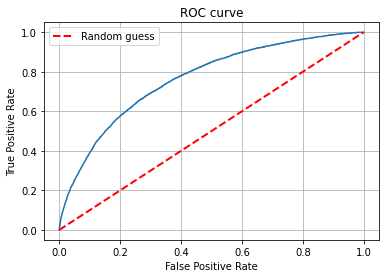

i :  0.04
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     56550
           1       0.22      0.54      0.31      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.68      0.60     61503
weighted avg       0.89      0.81      0.84     61503

[[47100  9450]
 [ 2293  2660]]
accuracy :  0.809
roc_auc_score :  0.768
recall score :  0.537
f1 score :  0.312


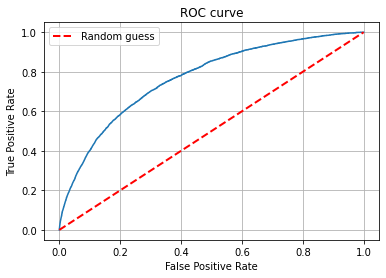

i :  0.05
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     56550
           1       0.22      0.53      0.31      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.68      0.60     61503
weighted avg       0.89      0.81      0.84     61503

[[47204  9346]
 [ 2318  2635]]
accuracy :  0.81
roc_auc_score :  0.77
recall score :  0.532
f1 score :  0.311


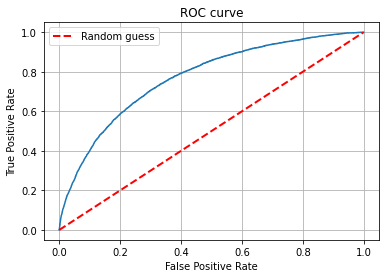

i :  0.06
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.53      0.31      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.68      0.60     61503
weighted avg       0.89      0.81      0.84     61503

[[47318  9232]
 [ 2329  2624]]
accuracy :  0.812
roc_auc_score :  0.773
recall score :  0.53
f1 score :  0.312


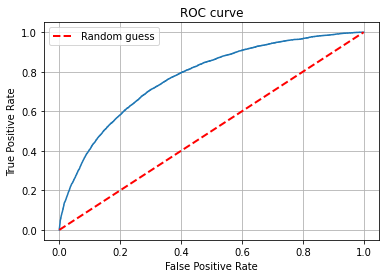

i :  0.07
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.53      0.31      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.68      0.60     61503
weighted avg       0.89      0.81      0.85     61503

[[47480  9070]
 [ 2347  2606]]
accuracy :  0.814
roc_auc_score :  0.773
recall score :  0.526
f1 score :  0.313


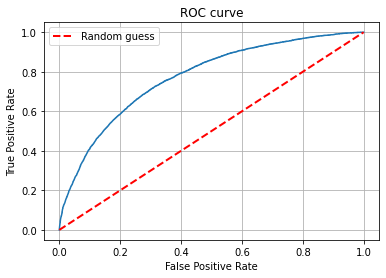

i :  0.08
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.23      0.53      0.32      4953

    accuracy                           0.82     61503
   macro avg       0.59      0.69      0.61     61503
weighted avg       0.89      0.82      0.85     61503

[[47577  8973]
 [ 2329  2624]]
accuracy :  0.816
roc_auc_score :  0.774
recall score :  0.53
f1 score :  0.317


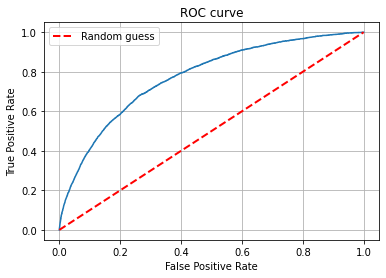

i :  0.09
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.52      0.31      4953

    accuracy                           0.82     61503
   macro avg       0.59      0.68      0.60     61503
weighted avg       0.89      0.82      0.85     61503

[[47590  8960]
 [ 2364  2589]]
accuracy :  0.816
roc_auc_score :  0.773
recall score :  0.523
f1 score :  0.314


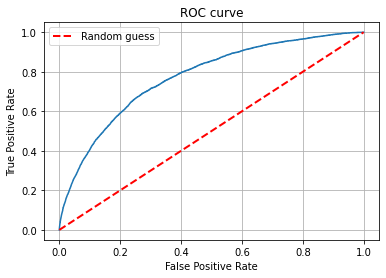

i :  0.1
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.23      0.52      0.32      4953

    accuracy                           0.82     61503
   macro avg       0.59      0.68      0.61     61503
weighted avg       0.89      0.82      0.85     61503

[[47688  8862]
 [ 2359  2594]]
accuracy :  0.818
roc_auc_score :  0.773
recall score :  0.524
f1 score :  0.316


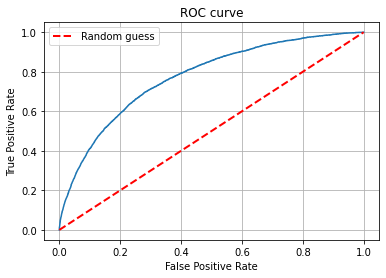

In [12]:
for i in l:
    print("i : ",i)
    evaluationClassification(xgb.XGBClassifier(
    objective="binary:logistic",
    scale_pos_weight=8,
    eval_metric="auc",
    max_depth=7,
    learning_rate=i,
    nthread=4
))

In [14]:
l=[i/10.0 for i in range(2,11,1)]

<h2>min_child_weight</h2>

In [ ]:
for i in range(1,6,2):
    print("i : ",i)
    evaluationClassification(xgb.XGBClassifier(
    gamma=0.4,
    objective="binary:logistic",
    scale_pos_weight=12,
    eval_metric="auc",
    max_depth=4,
    min_child_weight=i,
    learning_rate=0.1,
))

i :  1
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.53      0.31      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.68      0.60     61503
weighted avg       0.89      0.81      0.85     61503

[[47494  9056]
 [ 2342  2611]]
accuracy :  0.815
roc_auc_score :  0.773
recall score :  0.527
f1 score :  0.314


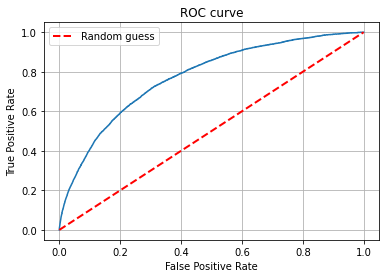

i :  2
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.53      0.31      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.68      0.60     61503
weighted avg       0.89      0.81      0.85     61503

[[47439  9111]
 [ 2326  2627]]
accuracy :  0.814
roc_auc_score :  0.774
recall score :  0.53
f1 score :  0.315


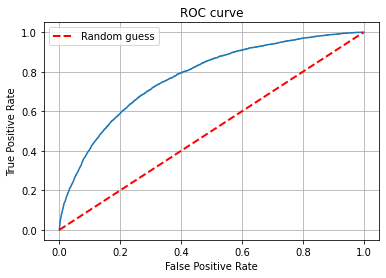

i :  3
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.53      0.31      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.68      0.60     61503
weighted avg       0.89      0.81      0.85     61503

[[47434  9116]
 [ 2341  2612]]
accuracy :  0.814
roc_auc_score :  0.773
recall score :  0.527
f1 score :  0.313


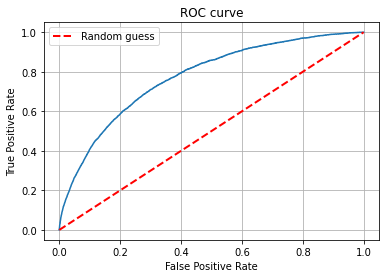

i :  4
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.53      0.32      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.69      0.60     61503
weighted avg       0.89      0.81      0.85     61503

[[47432  9118]
 [ 2306  2647]]
accuracy :  0.814
roc_auc_score :  0.773
recall score :  0.534
f1 score :  0.317


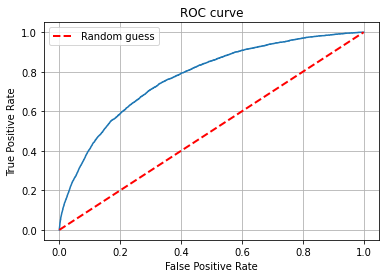

i :  5
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.23      0.53      0.32      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.69      0.60     61503
weighted avg       0.89      0.81      0.85     61503

[[47470  9080]
 [ 2314  2639]]
accuracy :  0.815
roc_auc_score :  0.774
recall score :  0.533
f1 score :  0.317


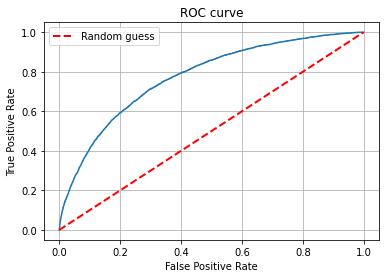

In [19]:
for i in range(1,6,1):
    print("i : ",i)
    evaluationClassification(xgb.XGBClassifier(
    objective="binary:logistic",
    scale_pos_weight=8,
    eval_metric="auc",
    max_depth=7,
    min_child_weight=i,
    gamma=0.4,
    learning_rate=0.08
))

i :  6
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.53      0.31      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.68      0.60     61503
weighted avg       0.89      0.81      0.85     61503

[[47434  9116]
 [ 2329  2624]]
accuracy :  0.814
roc_auc_score :  0.774
recall score :  0.53
f1 score :  0.314


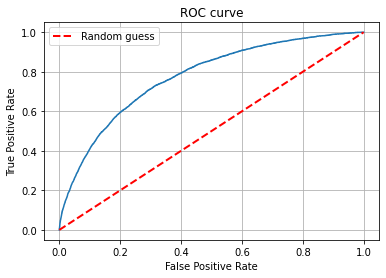

i :  7
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.54      0.32      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.69      0.60     61503
weighted avg       0.89      0.81      0.85     61503

[[47357  9193]
 [ 2298  2655]]
accuracy :  0.813
roc_auc_score :  0.774
recall score :  0.536
f1 score :  0.316


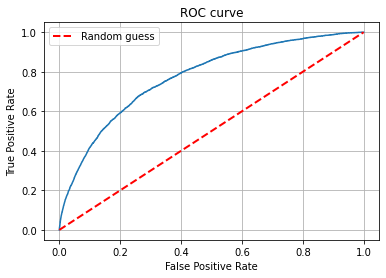

i :  8
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.23      0.54      0.32      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.69      0.61     61503
weighted avg       0.90      0.81      0.85     61503

[[47441  9109]
 [ 2297  2656]]
accuracy :  0.815
roc_auc_score :  0.774
recall score :  0.536
f1 score :  0.318


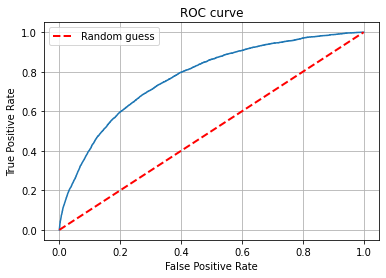

i :  9
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.53      0.32      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.69      0.60     61503
weighted avg       0.89      0.81      0.85     61503

[[47407  9143]
 [ 2309  2644]]
accuracy :  0.814
roc_auc_score :  0.774
recall score :  0.534
f1 score :  0.316


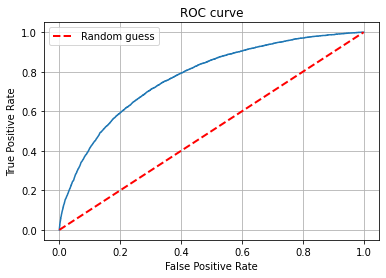

i :  10
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.53      0.31      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.68      0.60     61503
weighted avg       0.89      0.81      0.85     61503

[[47363  9187]
 [ 2319  2634]]
accuracy :  0.813
roc_auc_score :  0.774
recall score :  0.532
f1 score :  0.314


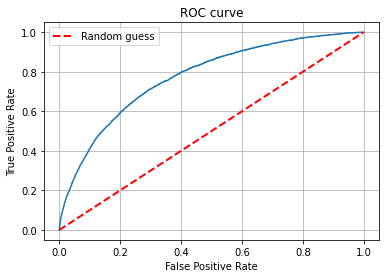

i :  11
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.23      0.53      0.32      4953

    accuracy                           0.82     61503
   macro avg       0.59      0.69      0.61     61503
weighted avg       0.90      0.82      0.85     61503

[[47528  9022]
 [ 2306  2647]]
accuracy :  0.816
roc_auc_score :  0.775
recall score :  0.534
f1 score :  0.318


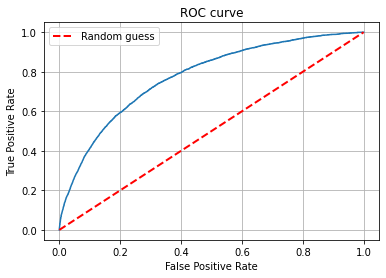

i :  12
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.23      0.54      0.32      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.69      0.61     61503
weighted avg       0.90      0.81      0.85     61503

[[47455  9095]
 [ 2297  2656]]
accuracy :  0.815
roc_auc_score :  0.774
recall score :  0.536
f1 score :  0.318


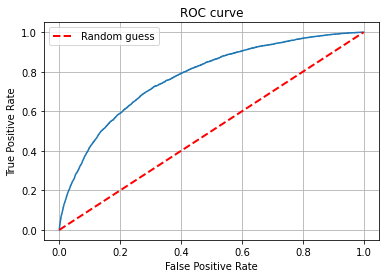

i :  13
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.53      0.32      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.69      0.60     61503
weighted avg       0.89      0.81      0.85     61503

[[47418  9132]
 [ 2317  2636]]
accuracy :  0.814
roc_auc_score :  0.775
recall score :  0.532
f1 score :  0.315


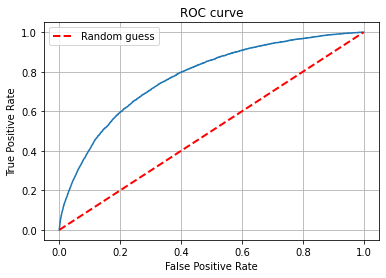

i :  14
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.54      0.32      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.69      0.60     61503
weighted avg       0.90      0.81      0.85     61503

[[47387  9163]
 [ 2295  2658]]
accuracy :  0.814
roc_auc_score :  0.774
recall score :  0.537
f1 score :  0.317


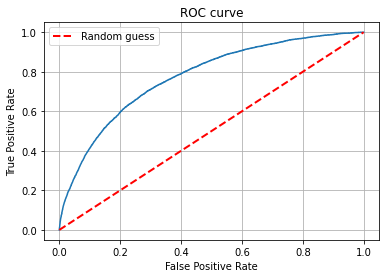

In [22]:
for i in range(6,15,1):
    print("i : ",i)
    evaluationClassification(xgb.XGBClassifier(
    objective="binary:logistic",
    scale_pos_weight=8,
    eval_metric="auc",
    max_depth=7,
    min_child_weight=i,
    gamma=0.4,
    learning_rate=0.07
))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     56550
           1       0.22      0.54      0.32      4953

    accuracy                           0.81     61503
   macro avg       0.59      0.69      0.60     61503
weighted avg       0.90      0.81      0.85     61503

[[47387  9163]
 [ 2295  2658]]
accuracy :  0.814
roc_auc_score :  0.774
recall score :  0.537
f1 score :  0.317


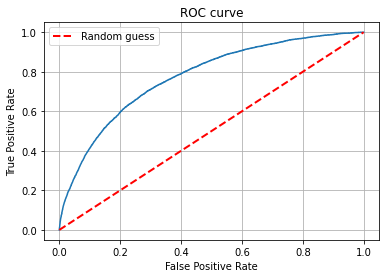

In [36]:
evaluationClassification(xgb.XGBClassifier(
    objective="binary:logistic",
    scale_pos_weight=8,
    eval_metric="auc",
    max_depth=7,
    min_child_weight=14,
    gamma=0.4,
    learning_rate=0.07
))

<h2>Catboost</h2>

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     56550
           1       0.24      0.46      0.32      4953

    accuracy                           0.84     61503
   macro avg       0.60      0.67      0.62     61503
weighted avg       0.89      0.84      0.86     61503

[[49558  6992]
 [ 2685  2268]]
accuracy :  0.843
roc_auc_score :  0.767
recall score :  0.458
f1 score :  0.319


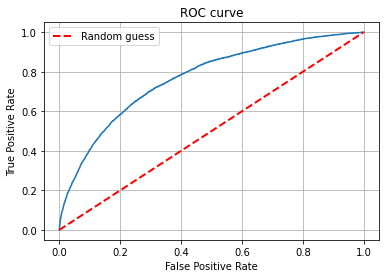

In [42]:
from catboost import CatBoostClassifier
evaluationClassification(CatBoostClassifier(scale_pos_weight=8,max_depth=7,eval_metric="F1",silent = True))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56550
           1       0.24      0.49      0.32      4953

    accuracy                           0.83     61503
   macro avg       0.59      0.68      0.61     61503
weighted avg       0.89      0.83      0.86     61503

[[48654  7896]
 [ 2514  2439]]
accuracy :  0.831
roc_auc_score :  0.769
recall score :  0.492
f1 score :  0.319


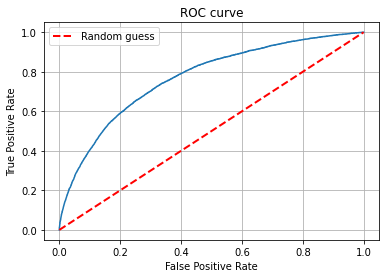

In [43]:
from catboost import CatBoostClassifier
evaluationClassification(CatBoostClassifier(scale_pos_weight=9,max_depth=7,eval_metric="F1",silent = True))

<h1>LGBM</h1>

              precision    recall  f1-score   support

           0       0.96      0.81      0.88     56550
           1       0.21      0.58      0.31      4953

    accuracy                           0.79     61503
   macro avg       0.59      0.70      0.60     61503
weighted avg       0.90      0.79      0.83     61503

[[46006 10544]
 [ 2083  2870]]
accuracy :  0.795
roc_auc_score :  0.776
recall score :  0.579
f1 score :  0.313


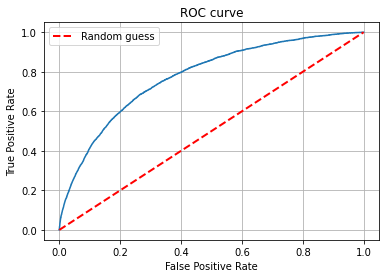

In [34]:
import lightgbm as lgb
evaluationClassification(lgb.LGBMClassifier(scale_pos_weight=8,max_depth=7))

              precision    recall  f1-score   support

           0       0.96      0.79      0.86     56550
           1       0.20      0.61      0.30      4953

    accuracy                           0.77     61503
   macro avg       0.58      0.70      0.58     61503
weighted avg       0.90      0.77      0.82     61503

[[44405 12145]
 [ 1916  3037]]
accuracy :  0.771
roc_auc_score :  0.775
recall score :  0.613
f1 score :  0.302


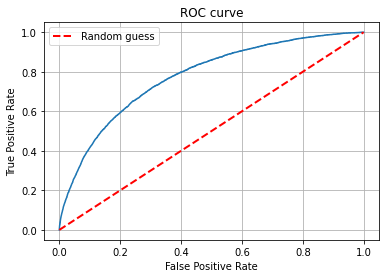

In [41]:
import lightgbm as lgb
evaluationClassification(lgb.LGBMClassifier(scale_pos_weight=9,max_depth=7))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     56550
           1       0.20      0.61      0.30      4953

    accuracy                           0.77     61503
   macro avg       0.58      0.70      0.58     61503
weighted avg       0.90      0.77      0.81     61503

[[44085 12465]
 [ 1929  3024]]
accuracy :  0.766
roc_auc_score :  0.771
recall score :  0.611
f1 score :  0.296


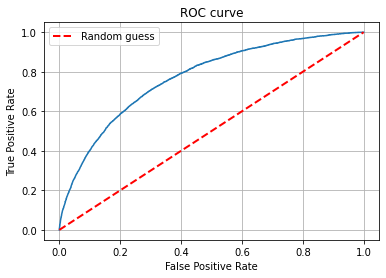

In [44]:
import lightgbm as lgb
evaluationClassification(lgb.LGBMClassifier(scale_pos_weight=9,max_depth=4))